In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [0]:
df2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [0]:
print("no of passengers in the dataset :-" +str(len(df2.index)))

no of passengers in the dataset :-418


# ***ANALYZE THE DATA***

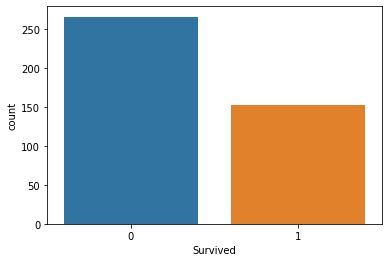

In [0]:
sns.countplot(x="Survived",data=df2)

THIS TELL THAT MAJORITY OF FEMALE **SURVIVES**

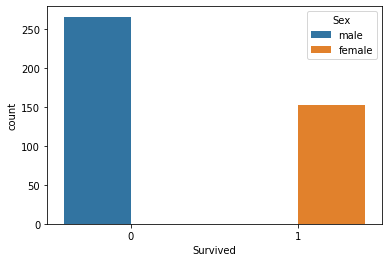

In [0]:
sns.countplot(x='Survived',hue='Sex',data=df2)

This states that the which class person survives ????

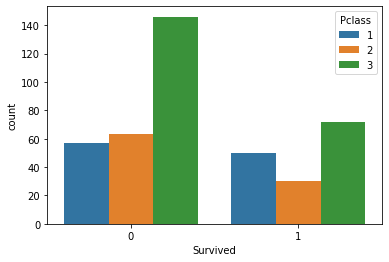

In [0]:
sns.countplot(x='Survived',hue='Pclass',data=df2)

Age distribution

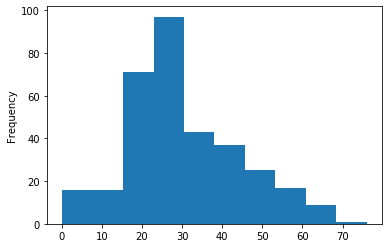

In [0]:
df2['Age'].plot.hist()

FARE SIZE

AttributeError: ignored

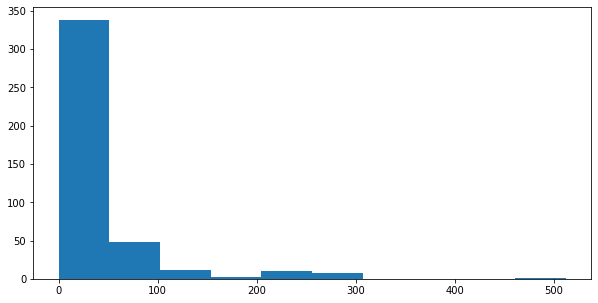

In [0]:
df2["Fare"].plot.hist(bin=20,figsize=(10,5))

all columns **list**

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


number of siblings and spouses board the titanic........

*neither a children and spouse board the titanic*

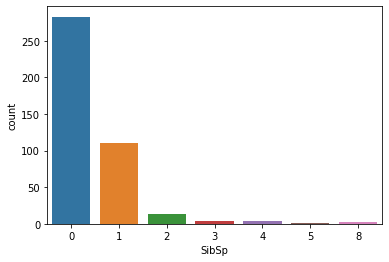

In [0]:
sns.countplot(x='SibSp',data=df2)

no of parent-children board the titanic

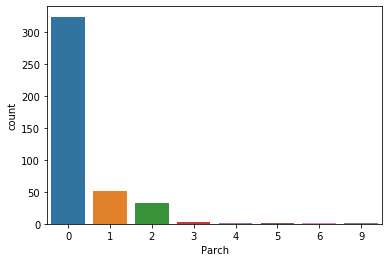

In [0]:
sns.countplot(x='Parch',data=df2)

DATA WRANGLING



 CLEAN THE DATA BY REMOVING NAN VALUES AND UNNECESSARY COLUMNS IN THE DATASET

prints the ***nan*** values in the columns

In [0]:
df2.isnull().sum()    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

vmin, vmax:floats, optional
Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

here we can see only two columns have missind data values...

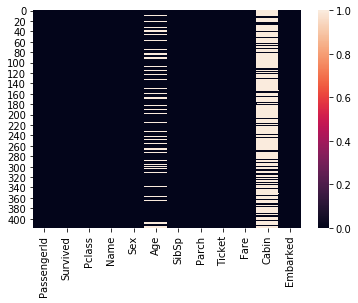

In [0]:
sns.heatmap(df2.isnull(),vmin=0, vmax=1)

From this graph, we can see that ages of Class 1 and 2 are much more than in class 3.

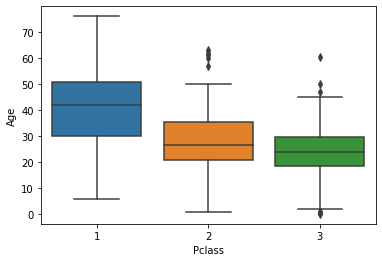

In [0]:
sns.boxplot(x='Pclass',y='Age',data=df2)

drop the cabin because it has nan values

In [0]:
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df2.drop(df2.index[10], inplace=True)

In [0]:
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


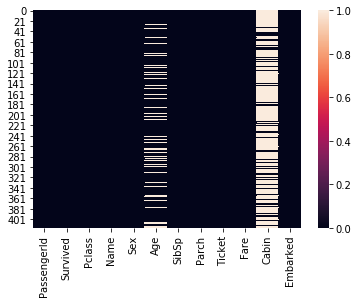

In [0]:
sns.heatmap(df2.isnull(),vmin=0, vmax=1)

In [0]:
df2.dropna(inplace=True)

none of the nan values exist

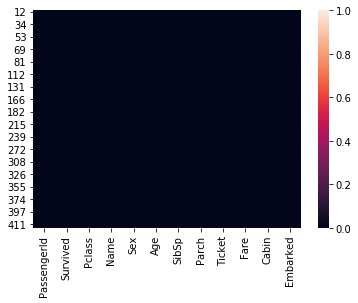

In [0]:
sns.heatmap(df2.isnull(),vmin=0, vmax=1)

In [0]:
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S


no string values should be there,convert into dummy values

In [0]:
sex=pd.get_dummies(df2['Sex'],drop_first=True)
sex.head(6)

,male
12,0
14,0
24,0
26,0
28,1
34,1


In [0]:
embark=pd.get_dummies(df2["Embarked"],drop_first=True)
embark.head(2)

,Q,S
12,0,1
14,0,1


In [0]:
Pclass=pd.get_dummies(df2["Pclass"],drop_first=True)
Pclass.head(2)

,2,3
12,0,0
14,0,0


In [0]:
df2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
